## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """

    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
nesterov = [True,False]
MOMENTUM = [ 0.95, 0.9, 0.8, 0.7 ]

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for mo in MOMENTUM:
    for ne in nesterov:
        
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with MOMENTUM = %.6f" % (mo),"with nesterov: ", ne)
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=ne, momentum=mo)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = "exp-momentum-%s" % str(mo)
        results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with MOMENTUM = 0.950000 with nesterov:  True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 218us/step - loss: 2.0555 - acc: 0.2536 - val_loss: 1.9029 - val_acc: 0.3277
Epoch 2/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.8192 - acc: 0.3567 - val_loss: 1.7622 - val_acc: 0.3799
Epoch 3/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.7352 - acc: 0.3893 - val_loss: 1.6932 - val_acc: 0.4098
Epoch 4/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.6730 - acc: 0.4109 - val_loss: 1.6500 - val_acc: 0.4165
Epoch 5/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.6332 - acc: 0.4235 - val_loss: 1.6099 - val_acc: 0.4333
Epoch 6/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.5964 - acc: 0.4364 - val_loss: 1.5861 - val_acc: 0.4434
Epoch 7/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.5625 - acc: 0.4496 - val_loss: 1.5615 

Epoch 2/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.8964 - acc: 0.3363 - val_loss: 1.8463 - val_acc: 0.3530
Epoch 3/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.8184 - acc: 0.3651 - val_loss: 1.7931 - val_acc: 0.3797
Epoch 4/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.7675 - acc: 0.3816 - val_loss: 1.7443 - val_acc: 0.3990
Epoch 5/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.7258 - acc: 0.3972 - val_loss: 1.7111 - val_acc: 0.4054
Epoch 6/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.6938 - acc: 0.4064 - val_loss: 1.6774 - val_acc: 0.4109
Epoch 7/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.6637 - acc: 0.4184 - val_loss: 1.6607 - val_acc: 0.4180
Epoch 8/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.6371 - acc: 0.4272 - val_loss: 1.6399 - val_acc: 0.4252
Epoch 9/50
50000/50000 [==========

Epoch 3/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.8905 - acc: 0.3391 - val_loss: 1.8596 - val_acc: 0.3553
Epoch 4/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.8361 - acc: 0.3587 - val_loss: 1.8184 - val_acc: 0.3629
Epoch 5/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.7989 - acc: 0.3702 - val_loss: 1.7898 - val_acc: 0.3751: 5s - loss: 1. - ETA: 4s - loss: 1.8 
Epoch 6/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.7690 - acc: 0.3839 - val_loss: 1.7573 - val_acc: 0.3838
Epoch 7/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.7436 - acc: 0.3913 - val_loss: 1.7383 - val_acc: 0.3947
Epoch 8/50
50000/50000 [==============================] - 12s 230us/step - loss: 1.7209 - acc: 0.3993 - val_loss: 1.7109 - val_acc: 0.4016
Epoch 9/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.7008 - acc: 0.4058 - val_loss: 1.6983 - val_acc: 0

50000/50000 [==============================] - 9s 174us/step - loss: 1.8938 - acc: 0.3354 - val_loss: 1.8758 - val_acc: 0.3463
Epoch 5/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.8583 - acc: 0.3496 - val_loss: 1.8503 - val_acc: 0.3509
Epoch 6/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.8312 - acc: 0.3585 - val_loss: 1.8199 - val_acc: 0.3631
Epoch 7/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.8085 - acc: 0.3672 - val_loss: 1.8046 - val_acc: 0.3707
Epoch 8/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.7894 - acc: 0.3732 - val_loss: 1.7829 - val_acc: 0.3784
Epoch 9/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.7717 - acc: 0.3798 - val_loss: 1.7653 - val_acc: 0.3856
Epoch 10/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.7563 - acc: 0.3852 - val_loss: 1.7493 - val_acc: 0.3879
Epoch 11/50
50000/50000 [==================

50000/50000 [==============================] - 8s 166us/step - loss: 1.8531 - acc: 0.3513 - val_loss: 1.8424 - val_acc: 0.3537
Epoch 6/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.8256 - acc: 0.3617 - val_loss: 1.8162 - val_acc: 0.3644
Epoch 7/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.8032 - acc: 0.3697 - val_loss: 1.7964 - val_acc: 0.3738
Epoch 8/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.7829 - acc: 0.3742 - val_loss: 1.7818 - val_acc: 0.3746
Epoch 9/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.7652 - acc: 0.3815 - val_loss: 1.7589 - val_acc: 0.3848
Epoch 10/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.7488 - acc: 0.3872 - val_loss: 1.7477 - val_acc: 0.3838
Epoch 11/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.7338 - acc: 0.3915 - val_loss: 1.7301 - val_acc: 0.3936
Epoch 12/50
50000/50000 [==================

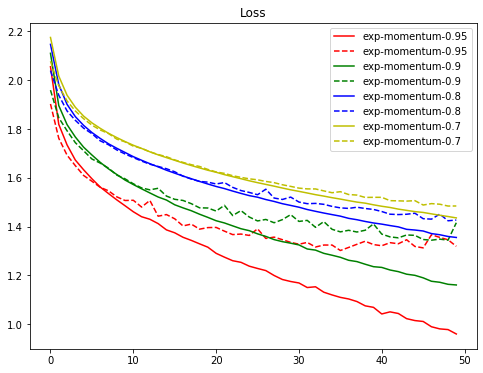

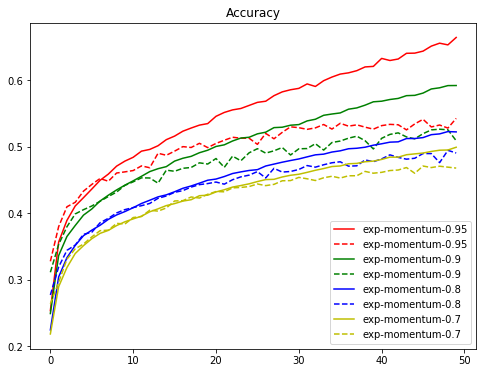

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()